In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib.mlab import frange
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

## Chargement du jeu de données Shuttle

Shuttle contient 10 attributs dont le dernier est la classe à expliquer.
Il y a 46464 observations dont 878 anormales.
Avec le dernier attribut, nous avons les classes "o" pour les anomalies et "n" pour les observations normales.

In [2]:
data_brut_Shuttle = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/shuttle-unsupervised-ad_2019-06-14 17:33:02.493755.csv', header=None, index_col=None)
X_Shuttle = data_brut_Shuttle[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y_brut_Shuttle = data_brut_Shuttle[[9]]
data_brut_Shuttle.describe()

,0,1,2,3,4,5,6,7,8
count,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000
mean,44.775482,-0.712509,84.834108,0.279291,38.652763,2.289708,40.070334,46.180419,6.299888
std,8.753404,44.218007,8.731175,37.317203,15.902506,177.518356,10.969455,17.052467,15.005878
min,27.000000,-4475.000000,21.000000,-3939.000000,-188.000000,-12809.000000,-26.000000,-353.000000,-356.000000
25%,37.000000,0.000000,79.000000,0.000000,34.000000,-4.000000,34.000000,35.000000,0.000000
50%,43.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000
75%,49.000000,0.000000,87.000000,0.000000,46.000000,5.000000,43.000000,52.000000,2.000000
max,123.000000,1963.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000


## Chargement du jeu de données KDD99-Cup HTTP

KDD99-Cup HTTP contient 30 attributs dont le dernier est la classe à expliquer.
Il y a 620098 observations dont 1052 anormales.
Avec le dernier attribut, nous avons les classes "o" pour les anomalies et "n" pour les observations normales.

In [3]:
data_brut_KDD99CUP = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/kdd99-unsupervised-ad_2019-06-24 16:08:29.815617.csv', header=None, index_col=None)
X_KDD99CUP = data_brut_KDD99CUP[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]]
y_brut_KDD99CUP = data_brut_KDD99CUP[[29]]
data_brut_KDD99CUP.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,620098.000000,620098.000000,6.200980e+05,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,...,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000
mean,0.627670,280.374673,4.099298e+03,0.005012,0.912428,0.000947,0.000318,0.000013,0.000010,0.005409,...,127.698101,244.485422,0.996744,0.000796,0.074723,0.031820,0.001920,0.001473,0.087651,0.086732
std,53.972528,1509.901935,2.369388e+04,0.098271,0.282671,0.045654,0.017821,0.003592,0.003111,0.073346,...,105.897233,40.458619,0.033137,0.009522,0.185812,0.050689,0.030694,0.028037,0.274777,0.268543
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,210.000000,4.580000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,240.000000,1.425000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.000000,255.000000,1.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,302.000000,3.731000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000
max,41065.000000,54540.000000,1.173059e+07,21.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Transformation de la classe à expliquer

L'objectif ici est de remplacer les "o" par -1 et les "n" par 1 afin de faire les matrices de confusion avec la fonction dédiée de scikit-learn.

In [4]:
y_transform_Shuttle = y_brut_Shuttle
y_transform_Shuttle = np.where(y_transform_Shuttle=='o',-1,1)
#y_transform
y_transform_KDD99CUP = y_brut_KDD99CUP
y_transform_KDD99CUP = np.where(y_transform_KDD99CUP=='o',-1,1)
#y_transform_KDD99CUP

## Shuttle

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier n_estimators

### Etude de l'inconstance de IForest
Utilisant les valeurs par défaut des paramètres de IForest au niveau de scikit-learn

In [5]:
study_executions_time_IF_Shuttle = []
study_roc_auc_IF_Shuttle = []
study_recalls_IF_Shuttle = []
study_specificity_IF_Shuttle = []

for j in range(10, 100, 10):
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    study_func_IF_Shuttle = IsolationForest(behaviour="new")
    study_func_IF_Shuttle.fit(X_Shuttle)
    study_y_pred_IF_Shuttle = study_func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    study_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    study_executions_time_IF_Shuttle.append(study_exec_time_IF_Shuttle)
    
    # Recall
    study_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, study_y_pred_IF_Shuttle))
    
    # Specificity
    study_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, study_y_pred_IF_Shuttle))
    
    # Calcul de l'aire sous la courbe ROC
    study_y_DF_IF_Shuttle = study_func_IF_Shuttle.decision_function(X_Shuttle)
    study_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, study_y_DF_IF_Shuttle)
    study_roc_auc_IF_Shuttle.append(study_auc_IF_Shuttle)

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-

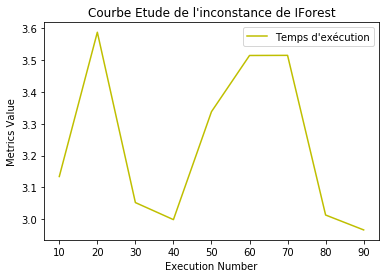

In [6]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_executions_time_IF_Shuttle, "y-", label="Temps d'exécution")
plt.title("Courbe Etude de l'inconstance de IForest")
#plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

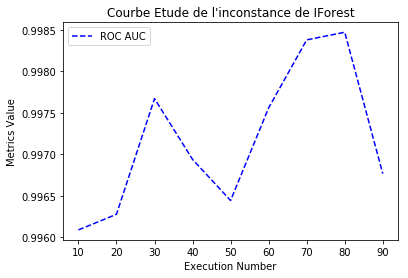

In [7]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_roc_auc_IF_Shuttle, "b--", label="ROC AUC")
plt.title("Courbe Etude de l'inconstance de IForest")
#plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

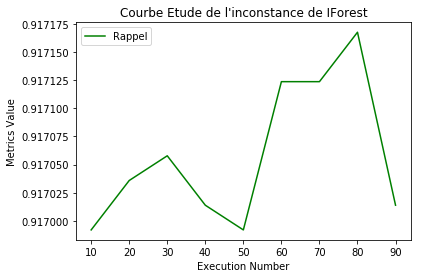

In [8]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_recalls_IF_Shuttle, "g-", label="Rappel")
plt.title("Courbe Etude de l'inconstance de IForest")
#plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

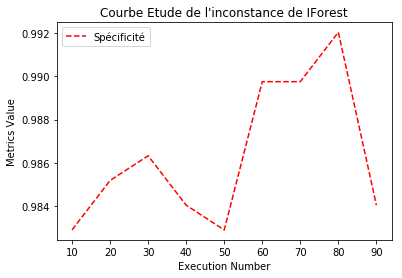

In [9]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_specificity_IF_Shuttle, "r--", label="Spécificité")
plt.title("Courbe Etude de l'inconstance de IForest")
#plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

#### Conclusion
Malgré le caractère aléatoire de IForest, les métrics choisis ont tendance à être constant durant l'exécution successive avec les mêmes paramètres.

In [10]:
executions_time_IF_Shuttle = []
roc_auc_IF_Shuttle = []
precisions_IF_Shuttle = []
recalls_IF_Shuttle = []
f1_scores_IF_Shuttle = []
tn_IF_Shuttle = []
fp_IF_Shuttle = []
fn_IF_Shuttle = []
tp_IF_Shuttle = []
specificity_IF_Shuttle = []
n_estimators_IF_Shuttle = []

for j in range(10, 1000, 10):
    print("n_estimators = "+str(j))
    n_estimators = j
    n_estimators_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    func_IF_Shuttle = IsolationForest(n_estimators=n_estimators, behaviour="new")
    func_IF_Shuttle.fit(X_Shuttle)
    y_pred_IF_Shuttle = func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    exec_time_IF_Shuttle = time() - start_IF_Shuttle
    executions_time_IF_Shuttle.append(exec_time_IF_Shuttle)
    
    # Precision
    precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # Recall
    recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # f1_score
    f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # Specificity
    specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    tn_IF_Shuttle.append(tn)
    fp_IF_Shuttle.append(fp)
    fn_IF_Shuttle.append(fn)
    tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    y_DF_IF_Shuttle = func_IF_Shuttle.decision_function(X_Shuttle)
    auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, y_DF_IF_Shuttle)
    roc_auc_IF_Shuttle.append(auc_IF_Shuttle)
        
    #print("Execution time of IsolationForest applied on Shuttle (in second)")
    #print(executions_time_IF_Shuttle)
    #print("ROC AUC for Isolation Forest applied on Shuttle")
    #print(roc_auc_IF_Shuttle)

n_estimators = 10


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 20


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 30


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 40


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 50


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 60


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 70


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 80


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 90


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 110


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 120


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 130


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 140


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 150


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 160


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 170


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 180


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 190


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 200


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 210


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 220


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 230


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 240


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 250


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 260


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 270


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 280


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 290


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 300


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 310


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 320


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 330


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 340


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 350


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 360


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 370


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 380


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 390


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 400


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 410


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 420


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 430


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 440


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 450


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 460


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 470


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 480


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 490


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 500


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 510


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 520


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 530


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 540


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 550


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 560


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 570


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 580


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 590


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 600


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 610


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 620


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 630


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 640


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 650


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 660


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 670


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 680


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 690


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 700


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 710


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 720


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 730


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 740


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 750


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 760


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 770


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 780


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 790


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 800


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 810


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 820


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 830


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 840


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 850


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 860


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 870


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 880


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 890


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 900


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 910


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 920


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 930


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 940


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 950


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 960


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 970


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 980


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


n_estimators = 990


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


### Résultat de Isolation Forest sur Shuttle

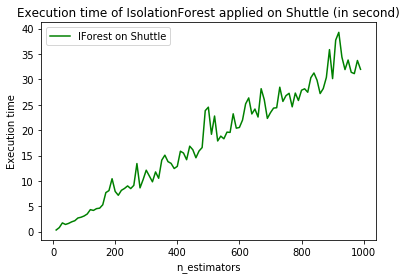

In [11]:
plt.plot(range(10, 1000, 10), executions_time_IF_Shuttle,  "g-", label="IForest on Shuttle")
plt.xlabel('n_estimators')
plt.ylabel('Execution time')
plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
plt.legend(loc="best")
plt.show()

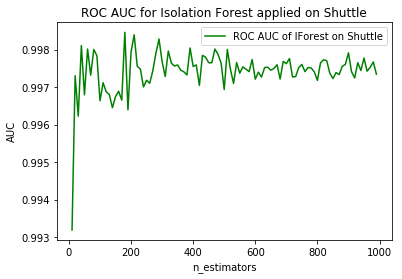

In [12]:
plt.plot(range(10, 1000, 10), roc_auc_IF_Shuttle,  "g-", label="ROC AUC of IForest on Shuttle")
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title("ROC AUC for Isolation Forest applied on Shuttle")
plt.legend(loc="best")
plt.show()

In [13]:
index = roc_auc_IF_Shuttle.index(max(roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(executions_time_IF_Shuttle[index])+"s obtenue avec un n_estimators de "+str(n_estimators_IF_Shuttle[index])+" donnant un rappel de "+str(recalls_IF_Shuttle[index])+" et une spécificité de "+str(specificity_IF_Shuttle[index]))


La meilleure est 0.998458894235502 pour un temps d'exécution de 8.09360408782959s obtenue avec un n_estimators de 180 donnant un rappel de 0.917189488000702 et une spécificité de 0.9931662870159453


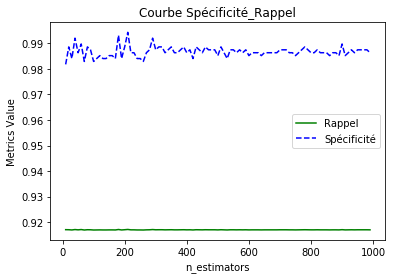

In [14]:
# Evolution de spécificité et rappel
plt.plot(n_estimators_IF_Shuttle, recalls_IF_Shuttle, "g-", label="Rappel")
plt.plot(n_estimators_IF_Shuttle, specificity_IF_Shuttle, "b--", label="Spécificité")
plt.title("Courbe Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('n_estimators')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

No handles with labels found to put in legend.


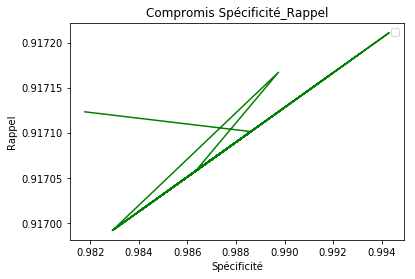

In [15]:
# Evolution de spécificité et rappel
plt.plot(specificity_IF_Shuttle, recalls_IF_Shuttle, "g-")
plt.title("Compromis Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('Spécificité')
plt.ylabel('Rappel')
plt.legend(loc="best")
    
plt.show()

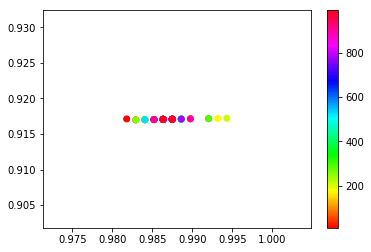

In [16]:
plt.scatter(specificity_IF_Shuttle,recalls_IF_Shuttle, c=n_estimators_IF_Shuttle, cmap=cm.hsv)
cbar= plt.colorbar()
plt.show()

### Résultat
###### Faisant varier n_estimators et max_samples = 256, contamination = 0,1
L'augmentation du nombre d'arbres augmente le temps d'exécution. L'écart est léger 
la AUC est aléatoire avec quelques pics. 
Quelque soit le nombre d'estimateur, la AUC > 0,99

Meilleure estimation :
    La meilleure est 0.998458894235502 pour un temps d'exécution de 8.09360408782959s obtenue avec un n_estimators de 180 donnant un rappel de 0.917189488000702 et une spécificité de 0.9931662870159453

Le nombre d'estimateur a une influence sur la performance de IForest pouvant l'améliorer comme la détérioré. Cela s'explique par le caractère aléatoire de la construction de l'arbre.

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier max_samples

In [17]:
MS_executions_time_IF_Shuttle = []
MS_roc_auc_IF_Shuttle = []
MS_precisions_IF_Shuttle = []
MS_recalls_IF_Shuttle = []
MS_f1_scores_IF_Shuttle = []
MS_tn_IF_Shuttle = []
MS_fp_IF_Shuttle = []
MS_fn_IF_Shuttle = []
MS_tp_IF_Shuttle = []
MS_specificity_IF_Shuttle = []
MS_max_samples_IF_Shuttle = []

for j in range(100, len(X_Shuttle), 1000):
    print("max_samples = "+str(j))
    max_samples = j
    MS_max_samples_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    MS_func_IF_Shuttle = IsolationForest(max_samples=max_samples, behaviour="new")
    MS_func_IF_Shuttle.fit(X_Shuttle)
    MS_y_pred_IF_Shuttle = MS_func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    MS_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    MS_executions_time_IF_Shuttle.append(MS_exec_time_IF_Shuttle)
    
    # Precision
    MS_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Recall
    MS_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # f1_score
    MS_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Specificity
    MS_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    MS_tn_IF_Shuttle.append(tn)
    MS_fp_IF_Shuttle.append(fp)
    MS_fn_IF_Shuttle.append(fn)
    MS_tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    MS_y_DF_IF_Shuttle = MS_func_IF_Shuttle.decision_function(X_Shuttle)
    MS_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, MS_y_DF_IF_Shuttle)
    MS_roc_auc_IF_Shuttle.append(MS_auc_IF_Shuttle)
    

max_samples = 100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 1100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 2100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 3100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 4100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 5100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 6100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 7100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 8100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 9100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 10100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 11100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 12100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 13100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 14100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 15100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 16100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 17100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 18100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 19100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 20100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 21100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 22100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 23100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 24100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 25100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 26100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 27100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 28100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 29100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 30100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 31100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 32100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 33100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 34100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 35100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 36100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 37100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 38100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 39100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 40100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 41100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 42100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 43100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 44100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 45100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 46100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


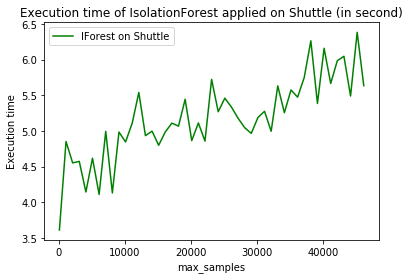

In [18]:
plt.plot(MS_max_samples_IF_Shuttle, MS_executions_time_IF_Shuttle,  "g-", label="IForest on Shuttle")
plt.xlabel('max_samples')
plt.ylabel('Execution time')
plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
plt.legend(loc="best")
plt.show()

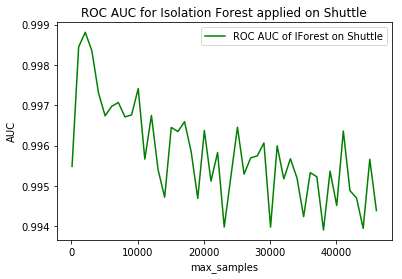

In [19]:
plt.plot(MS_max_samples_IF_Shuttle, MS_roc_auc_IF_Shuttle,  "g-", label="ROC AUC of IForest on Shuttle")
plt.xlabel('max_samples')
plt.ylabel('AUC')
plt.title("ROC AUC for Isolation Forest applied on Shuttle")
plt.legend(loc="best")
plt.show()

In [20]:
MS_index = MS_roc_auc_IF_Shuttle.index(max(MS_roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(MS_roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(MS_executions_time_IF_Shuttle[MS_index])+"s obtenue avec un max_samples de "+str(MS_max_samples_IF_Shuttle[MS_index])+" donnant un rappel de "+str(MS_recalls_IF_Shuttle[MS_index])+" et une spécificité de "+str(MS_specificity_IF_Shuttle[MS_index]))


La meilleure est 0.9988092295850334 pour un temps d'exécution de 4.553619146347046s obtenue avec un max_samples de 2100 donnant un rappel de 0.917255297679112 et une spécificité de 0.9965831435079726


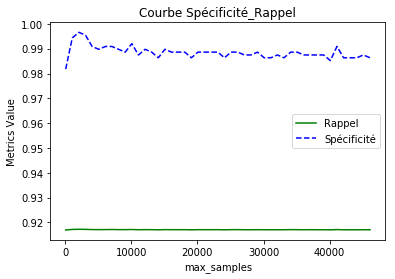

In [21]:
# Evolution de spécificité et rappel
plt.plot(MS_max_samples_IF_Shuttle, MS_recalls_IF_Shuttle, "g-", label="Rappel")
plt.plot(MS_max_samples_IF_Shuttle, MS_specificity_IF_Shuttle, "b--", label="Spécificité")
plt.title("Courbe Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('max_samples')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

No handles with labels found to put in legend.


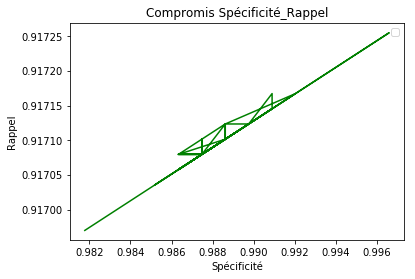

In [22]:
# Evolution de spécificité et rappel
plt.plot(MS_specificity_IF_Shuttle, MS_recalls_IF_Shuttle, "g-")
plt.title("Compromis Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('Spécificité')
plt.ylabel('Rappel')
plt.legend(loc="best")
    
plt.show()

### Résultat
###### Faisant varier max_samples, n_estimators = 100, contamination = 0,1
Plus le nombre d'éléments dans l'échantillon augmente, plus le temps d'exécution est long.
Par contre, quelque soit max_samples, la AUC ne varie pas beaucoup : entre 0,994 et 0,999.

Meilleure estimation :
    La meilleure est 0.9988092295850334 pour un temps d'exécution de 4.553619146347046s obtenue avec un max_samples de 2100 donnant un rappel de 0.917255297679112 et une spécificité de 0.9965831435079726

Max_samples n'a donc pas une grande incidence sur les performances de classification de IForest pour un jeu de données de taille et de dimension faibles. Mais il a une conséquences sur le temps d'exécution.

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier contamination (contamination : float in (0., 0.5), optional (default=0.1))

In [23]:
CONT_executions_time_IF_Shuttle = []
CONT_roc_auc_IF_Shuttle = []
CONT_precisions_IF_Shuttle = []
CONT_recalls_IF_Shuttle = []
CONT_f1_scores_IF_Shuttle = []
CONT_tn_IF_Shuttle = []
CONT_fp_IF_Shuttle = []
CONT_fn_IF_Shuttle = []
CONT_tp_IF_Shuttle = []
CONT_specificity_IF_Shuttle = []
CONT_contamination_IF_Shuttle = []

for j in np.arange(0., 0.5, 0.01):
    print("contamination = "+str(j))
    contamination = j
    CONT_contamination_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    CONT_func_IF_Shuttle = IsolationForest(contamination=contamination, behaviour="new")
    CONT_func_IF_Shuttle.fit(X_Shuttle)
    CONT_y_pred_IF_Shuttle = CONT_func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    CONT_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    CONT_executions_time_IF_Shuttle.append(CONT_exec_time_IF_Shuttle)
    
    # Precision
    CONT_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # Recall
    CONT_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # f1_score
    CONT_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # Specificity
    CONT_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, CONT_y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    CONT_tn_IF_Shuttle.append(tn)
    CONT_fp_IF_Shuttle.append(fp)
    CONT_fn_IF_Shuttle.append(fn)
    CONT_tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    CONT_y_DF_IF_Shuttle = CONT_func_IF_Shuttle.decision_function(X_Shuttle)
    CONT_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, CONT_y_DF_IF_Shuttle)
    CONT_roc_auc_IF_Shuttle.append(CONT_auc_IF_Shuttle)

contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamina

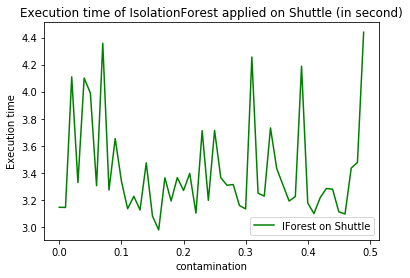

In [ ]:
plt.plot(CONT_contamination_IF_Shuttle, CONT_executions_time_IF_Shuttle,  "g-", label="IForest on Shuttle")
plt.xlabel('contamination')
plt.ylabel('Execution time')
plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
plt.legend(loc="best")
plt.show()

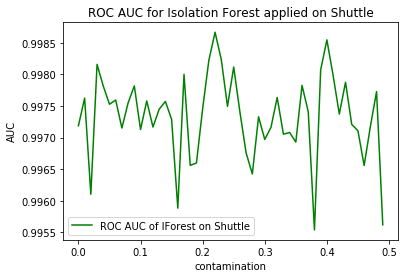

In [ ]:
plt.plot(CONT_contamination_IF_Shuttle, CONT_roc_auc_IF_Shuttle,  "g-", label="ROC AUC of IForest on Shuttle")
plt.xlabel('contamination')
plt.ylabel('AUC')
plt.title("ROC AUC for Isolation Forest applied on Shuttle")
plt.legend(loc="best")
plt.show()

In [ ]:
CONT_index = CONT_roc_auc_IF_Shuttle.index(max(CONT_roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(CONT_roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(CONT_executions_time_IF_Shuttle[CONT_index])+"s obtenue avec une contamination de "+str(CONT_contamination_IF_Shuttle[CONT_index])+" donnant un rappel de "+str(CONT_recalls_IF_Shuttle[CONT_index])+" et une spécificité de "+str(CONT_specificity_IF_Shuttle[CONT_index]))


La meilleure est 0.9986659298847596 pour un temps d'exécution de 3.101426124572754s obtenue avec une contamination de 0.22 donnant un rappel de 0.7950247883122011 et une spécificité de 1.0


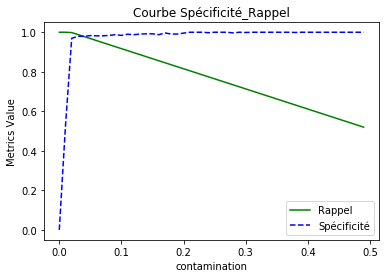

In [ ]:
# Evolution de spécificité et rappel
plt.plot(CONT_contamination_IF_Shuttle, CONT_recalls_IF_Shuttle, "g-", label="Rappel")
plt.plot(CONT_contamination_IF_Shuttle, CONT_specificity_IF_Shuttle, "b--", label="Spécificité")
plt.title("Courbe Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('contamination')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

No handles with labels found to put in legend.


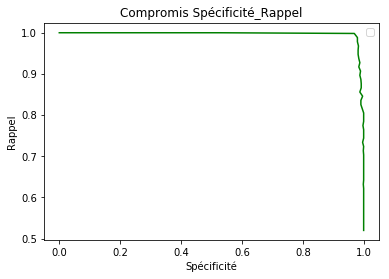

In [ ]:
# Evolution de spécificité et rappel
plt.plot(CONT_specificity_IF_Shuttle, CONT_recalls_IF_Shuttle, "g-")
plt.title("Compromis Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('Spécificité')
plt.ylabel('Rappel')
plt.legend(loc="best")
    
plt.show()

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier la combinaison entre n_estimators et max_samples

In [24]:
GENE_executions_time_IF_Shuttle = []
GENE_roc_auc_IF_Shuttle = []
GENE_precisions_IF_Shuttle = []
GENE_recalls_IF_Shuttle = []
GENE_f1_scores_IF_Shuttle = []
GENE_tn_IF_Shuttle = []
GENE_fp_IF_Shuttle = []
GENE_fn_IF_Shuttle = []
GENE_tp_IF_Shuttle = []
GENE_specificity_IF_Shuttle = []
GENE_contamination_IF_Shuttle = []
GENE_n_estimators_IF_Shuttle = []
GENE_max_samples_IF_Shuttle = []

contamination = 'auto'

for j in range(10, 300, 10):
    print("n_estimators = "+str(j))
    n_estimators = j
    for k in range(100, 10100, 1000):
        print("max_samples = "+str(k))
        max_samples = k
        GENE_n_estimators_IF_Shuttle.append(j)
        GENE_max_samples_IF_Shuttle.append(k)
        #for f in np.arange(0., 0.5, 0.01):
        #    print("contamination = "+str(f))
        #    contamination = f
        #    GENE_contamination_IF_Shuttle.append(f)
        start_IF_Shuttle = time()

        # Instanciation, fit and predict on Shuttle
        GENE_func_IF_Shuttle = IsolationForest(max_samples=max_samples, n_estimators=n_estimators, contamination=contamination, behaviour="new")
        GENE_func_IF_Shuttle.fit(X_Shuttle)
        GENE_y_pred_IF_Shuttle = GENE_func_IF_Shuttle.predict(X_Shuttle)

        # Calcul du temps d'exécution
        GENE_exec_time_IF_Shuttle = time() - start_IF_Shuttle
        GENE_executions_time_IF_Shuttle.append(GENE_exec_time_IF_Shuttle)

        # Precision
        GENE_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

        # Recall
        GENE_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

        # f1_score
        GENE_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

        # Specificity
        GENE_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

        # Matrice de confusion
        print(confusion_matrix(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))
        ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, GENE_y_pred_IF_Shuttle).ravel()
        tn = ttp
        fp = tfn
        fn = tfp
        tp = ttn
        GENE_tn_IF_Shuttle.append(tn)
        GENE_fp_IF_Shuttle.append(fp)
        GENE_fn_IF_Shuttle.append(fn)
        GENE_tp_IF_Shuttle.append(tp)

        # Calcul de l'aire sous la courbe ROC
        GENE_y_DF_IF_Shuttle = GENE_func_IF_Shuttle.decision_function(X_Shuttle)
        GENE_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, GENE_y_DF_IF_Shuttle)
        GENE_roc_auc_IF_Shuttle.append(GENE_auc_IF_Shuttle)

n_estimators = 10
max_samples = 100
[[  867    11]
 [ 3555 42031]]
max_samples = 1100
[[  868    10]
 [ 2051 43535]]
max_samples = 2100
[[  863    15]
 [  756 44830]]
max_samples = 3100
[[  868    10]
 [  970 44616]]
max_samples = 4100
[[  859    19]
 [  396 45190]]
max_samples = 5100
[[  873     5]
 [  848 44738]]
max_samples = 6100
[[  862    16]
 [  469 45117]]
max_samples = 7100
[[  861    17]
 [  813 44773]]
max_samples = 8100
[[  856    22]
 [   94 45492]]
max_samples = 9100
[[  785    93]
 [  208 45378]]
n_estimators = 20
max_samples = 100
[[  867    11]
 [ 6049 39537]]
max_samples = 1100
[[  863    15]
 [ 1401 44185]]
max_samples = 2100
[[  868    10]
 [  617 44969]]
max_samples = 3100
[[  863    15]
 [  453 45133]]
max_samples = 4100
[[  861    17]
 [  506 45080]]
max_samples = 5100
[[  858    20]
 [  495 45091]]
max_samples = 6100
[[  840    38]
 [  336 45250]]
max_samples = 7100
[[  859    19]
 [  134 45452]]
max_samples = 8100
[[  858    20]
 [  186 45400]]
max_samples = 91

[[  856    22]
 [  133 45453]]
max_samples = 9100
[[  845    33]
 [  156 45430]]
n_estimators = 170
max_samples = 100
[[  861    17]
 [ 4410 41176]]
max_samples = 1100
[[  865    13]
 [  819 44767]]
max_samples = 2100
[[  861    17]
 [  500 45086]]
max_samples = 3100
[[  864    14]
 [  541 45045]]
max_samples = 4100
[[  859    19]
 [  440 45146]]
max_samples = 5100
[[  859    19]
 [  313 45273]]
max_samples = 6100
[[  859    19]
 [  245 45341]]
max_samples = 7100
[[  859    19]
 [  191 45395]]
max_samples = 8100
[[  858    20]
 [  119 45467]]
max_samples = 9100
[[  842    36]
 [  116 45470]]
n_estimators = 180
max_samples = 100
[[  859    19]
 [ 4010 41576]]
max_samples = 1100
[[  862    16]
 [  745 44841]]
max_samples = 2100
[[  861    17]
 [  551 45035]]
max_samples = 3100
[[  860    18]
 [  405 45181]]
max_samples = 4100
[[  860    18]
 [  347 45239]]
max_samples = 5100
[[  859    19]
 [  275 45311]]
max_samples = 6100
[[  860    18]
 [  250 45336]]
max_samples = 7100
[[  859    19]

In [26]:
GENE_index = GENE_roc_auc_IF_Shuttle.index(max(GENE_roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(GENE_roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(GENE_executions_time_IF_Shuttle[GENE_index])+"s obtenue avec une contamination de "+str('auto')+" avec un max_samples de "+str(GENE_max_samples_IF_Shuttle[GENE_index])+" et avec un n_estimators de "+str(GENE_n_estimators_IF_Shuttle[GENE_index])+" donnant un rappel de "+str(GENE_recalls_IF_Shuttle[GENE_index])+" et une spécificité de "+str(GENE_specificity_IF_Shuttle[GENE_index]))


La meilleure est 0.9991657611381507 pour un temps d'exécution de 1.9468920230865479s obtenue avec une contamination de auto avec un max_samples de 1100 et avec un n_estimators de 90 donnant un rappel de 0.9871232395911025 et une spécificité de 0.9851936218678815


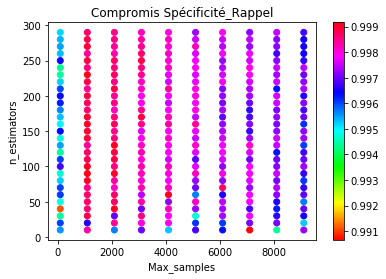

In [27]:
plt.scatter(GENE_max_samples_IF_Shuttle,GENE_n_estimators_IF_Shuttle, c=GENE_roc_auc_IF_Shuttle, cmap=cm.hsv)
plt.title("Compromis Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('Max_samples')
plt.ylabel('n_estimators')
cbar= plt.colorbar()
plt.show()

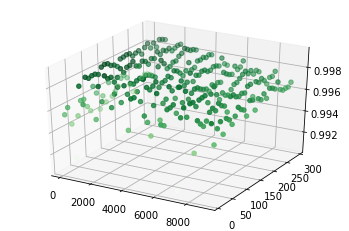

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(GENE_max_samples_IF_Shuttle, GENE_n_estimators_IF_Shuttle, GENE_roc_auc_IF_Shuttle, c=GENE_roc_auc_IF_Shuttle, cmap='Greens')


In [23]:
X, Y, Z = np.meshgrid(GENE_max_samples_IF_Shuttle, GENE_n_estimators_IF_Shuttle, GENE_roc_auc_IF_Shuttle)
print(GENE_roc_auc_IF_Shuttle)
ax.contour3D(X,Y,Z, 50, cmap='binary')

[0.9959535042879226, 0.996213232652354, 0.9962092226093071, 0.9966599214661178, 0.9988534275049678, 0.9955249668528093, 0.9932030394976997, 0.9928144900619392, 0.9953489996679035, 0.9947120024560951, 0.9945613822411007, 0.9992215894321549, 0.9986570228421048, 0.9972016645401363, 0.9967266555781273, 0.9971157421847633, 0.9967058808068296, 0.9981210762166022, 0.9956729511828104, 0.9977784111674777, 0.9949863093882378, 0.9991186150245746, 0.9984525106467269, 0.9991062725867861, 0.9974723486919563, 0.9969486445654749, 0.9977905287430392, 0.9977860814678847, 0.996577272105381, 0.9966356613303029, 0.9929298693690377, 0.9981518073876137, 0.9977403095123618, 0.9983801924560822, 0.9965236549566081, 0.9976239807869717, 0.9975841551881162, 0.9973600050249213, 0.9953076000334596, 0.9958969389455082, 0.9947267933936877, 0.9991228124528101, 0.9982629392970926, 0.9969193625065922, 0.9983918852918816, 0.9967086291229363, 0.9959245470300347, 0.9974857904561873, 0.9974054896564877, 0.9965756855774467, 0

TypeError: Input z must be a 2D array.

In [ ]:
GENE_executions_time_IF_Shuttle = []
GENE_roc_auc_IF_Shuttle = []
GENE_precisions_IF_Shuttle = []
GENE_recalls_IF_Shuttle = []
GENE_f1_scores_IF_Shuttle = []
GENE_tn_IF_Shuttle = []
GENE_fp_IF_Shuttle = []
GENE_fn_IF_Shuttle = []
GENE_tp_IF_Shuttle = []
GENE_specificity_IF_Shuttle = []
GENE_contamination_IF_Shuttle = []
GENE_n_estimators_IF_Shuttle = []
GENE_max_samples_IF_Shuttle = []

for j in range(10, 1000, 10):
    print("n_estimators = "+str(j))
    n_estimators = j
    GENE_n_estimators_IF_Shuttle.append(j)
    for k in range(100, len(X_Shuttle), 1000):
        print("max_samples = "+str(k))
        max_samples = k
        GENE_max_samples_IF_Shuttle.append(k)
        #for f in np.arange(0., 0.5, 0.01):
        #    print("contamination = "+str(f))
        #    contamination = f
        #    GENE_contamination_IF_Shuttle.append(f)
            start_IF_Shuttle = time()

            # Instanciation, fit and predict on Shuttle
            GENE_func_IF_Shuttle = IsolationForest(max_samples=max_samples, n_estimators=n_estimators, contamination=contamination, behaviour="new")
            GENE_func_IF_Shuttle.fit(X_Shuttle)
            GENE_y_pred_IF_Shuttle = GENE_func_IF_Shuttle.predict(X_Shuttle)

            # Calcul du temps d'exécution
            GENE_exec_time_IF_Shuttle = time() - start_IF_Shuttle
            GENE_executions_time_IF_Shuttle.append(GENE_exec_time_IF_Shuttle)

            # Precision
            GENE_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # Recall
            GENE_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # f1_score
            GENE_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # Specificity
            GENE_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # Matrice de confusion
            ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, GENE_y_pred_IF_Shuttle).ravel()
            tn = ttp
            fp = tfn
            fn = tfp
            tp = ttn
            GENE_tn_IF_Shuttle.append(tn)
            GENE_fp_IF_Shuttle.append(fp)
            GENE_fn_IF_Shuttle.append(fn)
            GENE_tp_IF_Shuttle.append(tp)

            # Calcul de l'aire sous la courbe ROC
            GENE_y_DF_IF_Shuttle = GENE_func_IF_Shuttle.decision_function(X_Shuttle)
            GENE_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, GENE_y_DF_IF_Shuttle)
            GENE_roc_auc_IF_Shuttle.append(GENE_auc_IF_Shuttle)

In [ ]:
GENE_index = GENE_roc_auc_IF_Shuttle.index(max(GENE_roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(GENE_roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(GENE_executions_time_IF_Shuttle[GENE_index])+"s obtenue avec une contamination de "+str(GENE_contamination_IF_Shuttle[GENE_index])+" avec un max_samples de "+str(GENE_max_samples_IF_Shuttle[GENE_index])+" et avec un n_estimators de "+str(GENE_n_estimators_IF_Shuttle[GENE_index])+" donnant un rappel de "+str(GENE_recalls_IF_Shuttle[GENE_index])+" et une spécificité de "+str(GENE_specificity_IF_Shuttle[GENE_index]))


### Interprétation du résultat de IsolationForest sur Shuttle

###### Faisant varier n_estimators

###### Faisant varier max_samples

###### Faisant varier contamination

###### Meilleure combinaison entre n_estimators et max_samples

###### Meilleure combinaison entre n_estimators et contamination

###### Meilleure combinaison entre max_samples et contamination

###### Meilleure combinaison entre max_samples, n_estimators et contamination